In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [222]:
import math
import os.path

import keras
import sklearn
import seaborn
import pandas
import numpy
from matplotlib import pyplot as plt

from microesc import urbansound8k, preprocess, train, test, report, stm32convert, stats, models


In [3]:
data = urbansound8k.load_dataset()
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


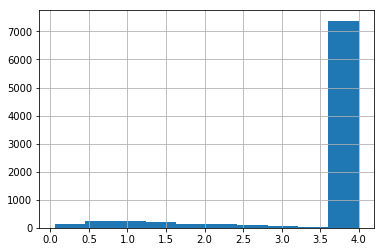

In [157]:
(data.end - data.start).hist()

In [259]:
s = {
    'model': 'sbcnn',
    'frames': 31,
    'n_mels': 60,
    'samplerate': 22050,
    'conv_size': (3,3),
    'downsample_size': (2,2),
    'downsample_type': 'stride',
    'filters': 20,
}
model = models.build(s)
ss, ll = stats.check_model_constraints(model)
ss

o {'frames': 31, 'bands': 60, 'channels': 1, 'pool': (2, 2), 'use_strides': True, 'kernels_start': 20}


{'maccs_frame': 3180954,
 'flash_usage': 359510.0,
 'ram_usage_max': 56490.0,
 'ram_usage_min': 56490.0}

In [243]:
ss

{'maccs_frame': 2912486,
 'flash_usage': 185600.0,
 'ram_usage_max': 25320.0,
 'ram_usage_min': 25320.0}

In [250]:
ll

,name,type,shape_in,shape_out,size_in,size_out,activations,weights
0,conv2d_16,Conv2D,"(60, 31, 1)","(60, 31, 24)",1860,44640,5400,240
3,activation_26,Activation,"(15, 15, 24)","(15, 15, 24)",5400,5400,5400,NaN
4,conv2d_17,Conv2D,"(15, 15, 24)","(15, 15, 48)",5400,10800,1008,10416
7,activation_27,Activation,"(3, 7, 48)","(3, 7, 48)",1008,1008,1008,NaN
8,conv2d_18,Conv2D,"(3, 7, 48)","(1, 5, 48)",1008,240,480,20784
12,dense_11,Dense,"(240,)","(64,)",240,64,64,15424
13,activation_29,Activation,"(64,)","(64,)",64,64,64,NaN
15,dense_12,Dense,"(64,)","(10,)",64,10,10,650
17,activation_30,Activation,"(10,)","(10,)",10,10,10,NaN


In [248]:
60*31*24 / 9

4960.0

In [249]:
15*15*24

5400

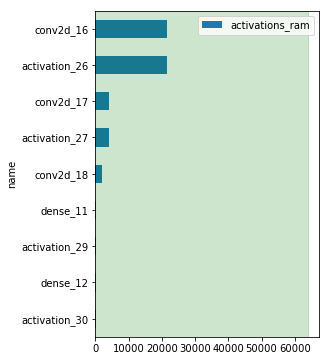

In [247]:
def plot_layers_ram(layers_ram, ax=None, max_ram=64e3):
    
    if not ax:
        fig, ax = plt.subplots(1, figsize=(4, 6))
    
    l = layers_ram.sort_index(ascending=False)
    l['activations_ram'] = 4 * l.activations
    l = l[l.activations_ram.notna()]
    l.plot(kind='barh', ax=ax, y='activations_ram', x='name')
    ax.axvspan(xmin=0, xmax=max_ram, alpha=0.2, color='green')
    
    return fig
    
plot_layers_ram(ll);


In [28]:
model.layers[0].get_output_shape_at(0)

(None, 60, 31, 1)

In [ ]:
# TODO: calculate per-class accuracy. For each fold
# TODO: compare single-frame accuracy (from training) versus voted accuracy
# TODO: compare no-overlap, 50% overlap and 10% overlap